<a href="https://colab.research.google.com/github/NamanSahai/Sneaker-Comparison-Data-Science-/blob/main/Sneaker_Comparison_(_Nike_v_s_Adidas_v_s_Puma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

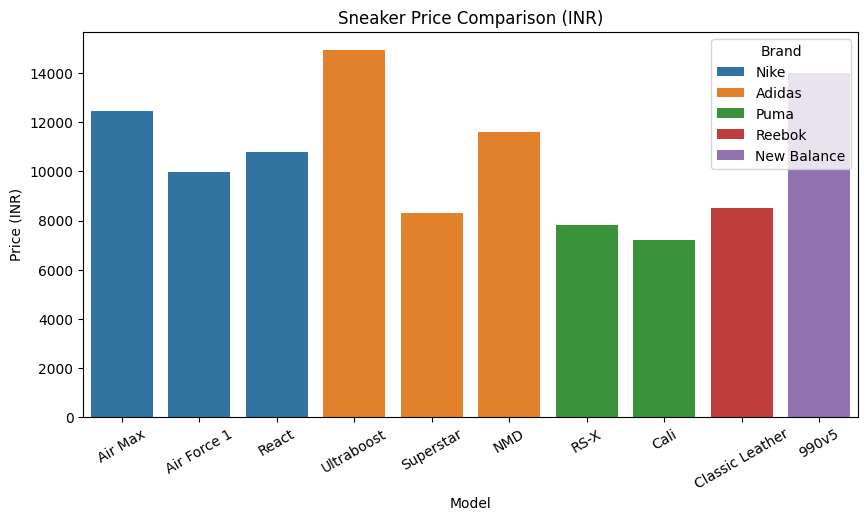

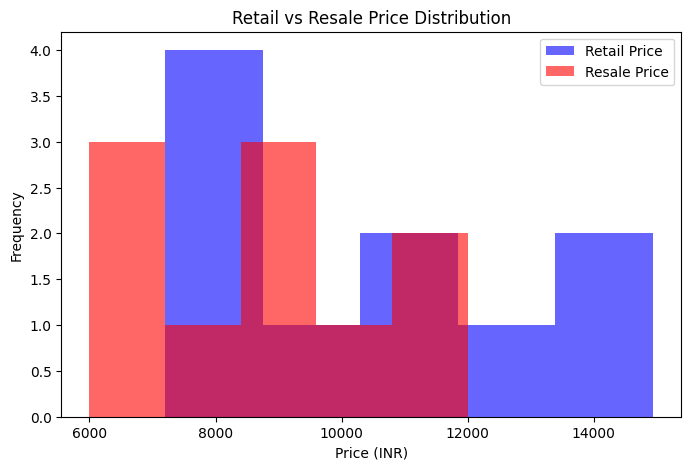

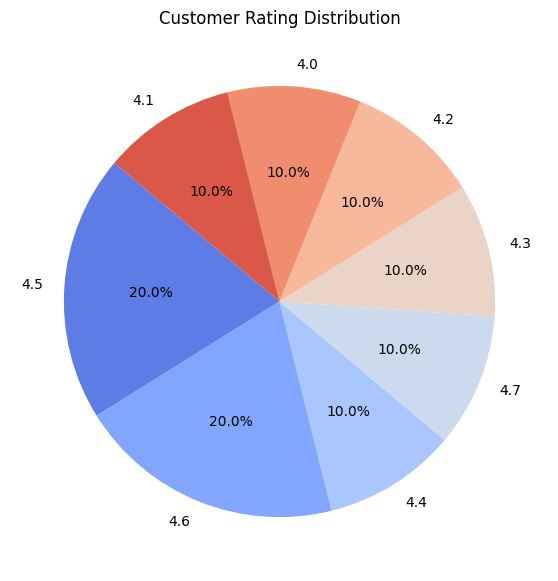

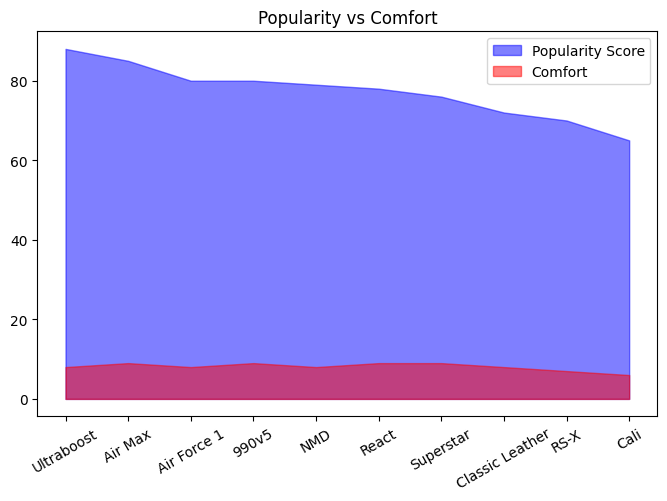

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO


# Sneaker Data with Additional Parameters
data = {
    "Brand": ["Nike", "Nike", "Nike", "Adidas", "Adidas", "Adidas", "Puma", "Puma", "Reebok", "New Balance"],
    "Model": ["Air Max", "Air Force 1", "React", "Ultraboost", "Superstar", "NMD", "RS-X", "Cali", "Classic Leather", "990v5"],
    "Price (INR)": [12450, 9960, 10790, 14940, 8300, 11620, 7800, 7200, 8500, 14000],
    "Resale Price (INR)": [9000, 8500, 9500, 12000, 7000, 10500, 6500, 6000, 7500, 11000],
    "Durability": [8, 9, 7, 9, 8, 8, 7, 6, 7, 9],
    "Comfort": [9, 8, 9, 8, 9, 8, 7, 6, 8, 9],
    "Popularity Score": [85, 80, 78, 88, 76, 79, 70, 65, 72, 80],
    "Customer Rating": [4.5, 4.6, 4.4, 4.7, 4.3, 4.5, 4.2, 4.0, 4.1, 4.6],
}

df = pd.DataFrame(data)


plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Price (INR)", hue="Brand", data=df)
plt.title("Sneaker Price Comparison (INR)")
plt.xticks(rotation=30)
plt.show()



plt.figure(figsize=(8, 5))
plt.hist(df["Price (INR)"], bins=5, alpha=0.6, label="Retail Price", color="blue")
plt.hist(df["Resale Price (INR)"], bins=5, alpha=0.6, label="Resale Price", color="red")
plt.title("Retail vs Resale Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.figure(figsize=(7, 7))
rating_counts = df["Customer Rating"].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(rating_counts)))
plt.title("Customer Rating Distribution")
plt.show()


df_sorted = df.sort_values(by="Popularity Score", ascending=False)

plt.figure(figsize=(8, 5))
plt.fill_between(df_sorted["Model"], df_sorted["Popularity Score"], color="blue", alpha=0.5, label="Popularity Score")
plt.fill_between(df_sorted["Model"], df_sorted["Comfort"], color="red", alpha=0.5, label="Comfort")
plt.xticks(rotation=30)
plt.title("Popularity vs Comfort")
plt.legend()
plt.show()


m = folium.Map(location=[50, -30], zoom_start=2)

# Nike HQ (Beaverton, Oregon, USA)
nike_hq = folium.Marker([45.5051, -122.8307], popup="Nike HQ (Beaverton, USA)", icon=folium.Icon(color="blue"))
nike_hq.add_to(m)

# Adidas HQ (Herzogenaurach, Germany)
adidas_hq = folium.Marker([49.5684, 10.8853], popup="Adidas HQ (Germany)", icon=folium.Icon(color="red"))
adidas_hq.add_to(m)

# Puma HQ (Germany)
puma_hq = folium.Marker([49.4521, 11.0767], popup="Puma HQ (Germany)", icon=folium.Icon(color="green"))
puma_hq.add_to(m)

# Reebok HQ (Boston, USA)
reebok_hq = folium.Marker([42.3601, -71.0589], popup="Reebok HQ (Boston, USA)", icon=folium.Icon(color="purple"))
reebok_hq.add_to(m)

# New Balance HQ (Boston, USA)
nb_hq = folium.Marker([42.3636, -71.2047], popup="New Balance HQ (Boston, USA)", icon=folium.Icon(color="orange"))
nb_hq.add_to(m)

# Display the Map
m
